# Sequencing

This model uses the basal ganglia model to cycle through a sequence of five
representations (i.e., **A** -> **B** -> **C** -> **D** -> **E** -> **A** -> ...). The
model incorporates a working memory
component (memory), which allows the Basal Ganglia to update that memory based on a set
of condition/action mappings.

In [1]:
# Setup the environment
from nengo import spa  # import spa related packages

## Create the model

The model has parameters as described in the book. In the book (Nengo 1.4) separate
"Rules"
and "Sequence" classes were created. However, this is not needed in Nengo 2.0 since you
can directly specify the rules using the built-in "Actions" class in the `nengo.spa`
package.
This class takes a string definition of the action as an
input as shown in the code where `-->` is used to split the action into condition and
effect. If no `-->` is used, it is treated as having no condition and just effect.

The syntax for creating an input function in Nengo 2.0 is also different from that in
Nengo 1.4 mentioned in the book. The syntax for Nengo 2.0, which you will use here, is
`spa.Input(<module>=<function>)`. The first parameter `<module>` refers to name of the
module
that you want to provide input to and the second parameter `<function>` refers to the
function to execute to generate inputs to that module. The functions should always
return strings, which will then be parsed by the relevant SPA vocabulary.

In Nengo 1.4, a memory element for representing the `state` was created by using the
`Buffer()` object as described in the book. However, in Nengo 2.0, you will use the
`State()` object
with the `feedback` parameter set to 1 for creating a memory module capable of storing a
vector over time.

In [2]:
# Number of dimensions for the Semantic Pointers
dim = 16

# Create the spa.SPA network to which we can add SPA objects
model = spa.SPA(label="Sequence")
with model:
    # Creating a working memory/cortical element
    model.state = spa.State(dimensions=dim, feedback=1, feedback_synapse=0.01)

    # Specifying the action mappings (rules) for BG and Thal
    actions = spa.Actions(
        "dot(state, A) --> state = B",
        "dot(state, B) --> state = C",
        "dot(state, C) --> state = D",
        "dot(state, D) --> state = E",
        "dot(state, E) --> state = A",
    )

    # Creating the BG and thalamus components that confirm to the specified rules
    model.bg = spa.BasalGanglia(actions=actions)
    model.thal = spa.Thalamus(model.bg)

    # Function that provides the model with an initial input semantic pointer.
    def start(t):
        if t < 0.1:  # Duration of the initial input = 0.1
            return "D"
        return "0"

    # Input
    model.input = spa.Input(state=start)

## Run the model

In [ ]:
# Import the nengo_gui visualizer to run and visualize the model.
from nengo_gui.ipython import IPythonViz

IPythonViz(model, "ch7-spa-sequence.py.cfg")

Press the play button in the visualizer to run the simulation. You should see the graphs
as shown in the figure below.

The graph on the top-left shows the semantic pointer representation of the values stored
in the `state` ensemble. The plot on the bottom-right shows the current transition or
the action being executed, and the plot on the top-right shows the utility (similarity)
of the current Basal Ganglia input (i.e., `state`) with the possible vocabulary vectors.

The book describes that the results of the model can be seen through the visualizer in
Nengo 1.4 GUI which has a "Utility" box and the "Rules" box. Note that the bottom-right
plot shows the same information as seen in the "Rules" box and top-right plot shows
the same information as seen in the "Utility" box.

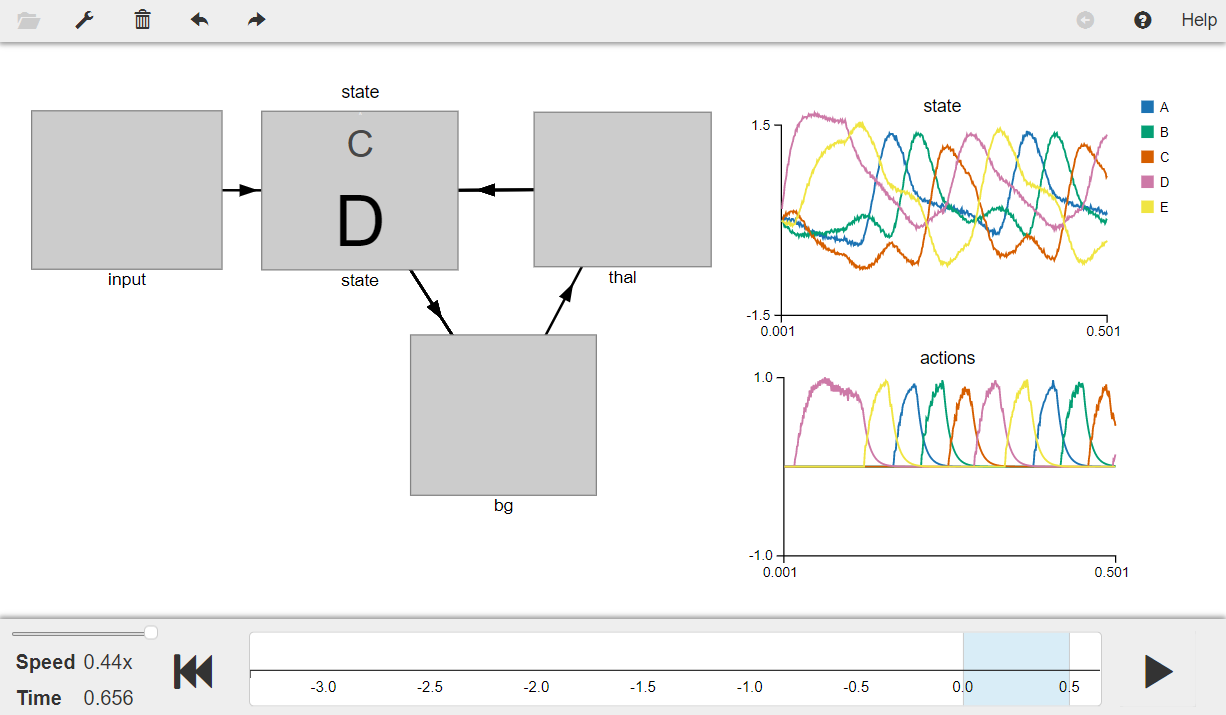

In [3]:
from IPython.display import Image

Image(filename="ch7-spa-sequence.png")